## Bibliotheken

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

Analyse

In [26]:
df = pd.read_csv("inventory_clean.csv")

In [27]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date").reset_index(drop=True)

In [28]:
df["Lag1"] = df["Inventory Level"].shift(1)
df["Lag2"] = df["Inventory Level"].shift(2)
df["MA7"] = df["Inventory Level"].rolling(window=7).mean()

df = df.dropna()

In [29]:
features = ["Lag1", "Lag2", "MA7", "Units Sold", "Price"]

x = df[features]
y = df["Inventory Level"]

split_index = int(len(x) * 0.8)

x_train, x_test = x.iloc[:split_index], x.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

assert len(x_test) > 0, "Test set ist leer"

In [30]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("=== Linear Regression ===")
print(f"MAE :  {mae:.2f}")
print(f"RMSE:  {rmse:.2f}")

=== Linear Regression ===
MAE :  79.60
RMSE:  97.82


In [32]:
y_pred_baseline = x_test["Lag1"].values

mae_base = mean_absolute_error(y_test, y_pred_baseline)
rmse_base = mean_squared_error(y_test, y_pred_baseline, squared=False)

print("\n=== Baseline (Lag1) ===")
print(f"MAE :  {mae_base:.2f}")
print(f"RMSE:  {rmse_base:.2f}")



=== Baseline (Lag1) ===
MAE :  150.68
RMSE:  183.82


In [33]:
improvement = (rmse_base - rmse) / rmse_base * 100
print(f"Improvement: {improvement:.1f}%")

Improvement: 46.8%


In [47]:
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print("\n=== Feature Influence ===")
print(coef_df)

if rmse < rmse_base:
    print("\n✔ Model beats baseline")
else:
    print("\n✘ Model does NOT beat baseline")


=== Feature Influence ===
      Feature  Coefficient
2         MA7     0.981849
3  Units Sold     0.606313
1        Lag2    -0.142216
0        Lag1    -0.137586
4       Price     0.050516

✔ Model beats baseline


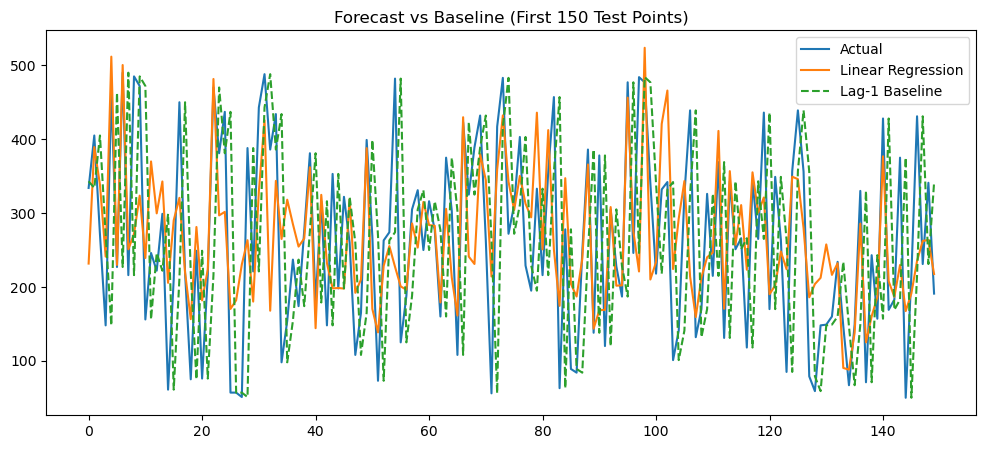

In [44]:
N = 150
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:N], label="Actual")
plt.plot(y_pred[:N], label="Linear Regression")
plt.plot(y_pred_baseline[:N], label="Lag-1 Baseline", linestyle="--")
plt.legend()
plt.title("Forecast vs Baseline (First 150 Test Points)")
plt.show()

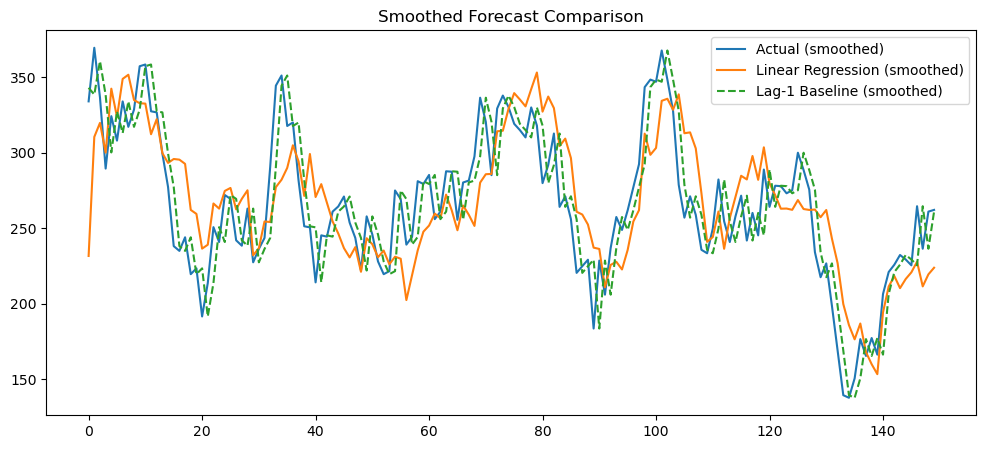

In [41]:
def smooth(x, window=7):
    return pd.Series(x).rolling(window, min_periods=1).mean()

plt.figure(figsize=(12,5))
plt.plot(smooth(y_test.values[:N]), label="Actual (smoothed)")
plt.plot(smooth(y_pred[:N]), label="Linear Regression (smoothed)")
plt.plot(smooth(y_pred_baseline[:N]), label="Lag-1 Baseline (smoothed)", linestyle="--")
plt.legend()
plt.title("Smoothed Forecast Comparison")
plt.show()

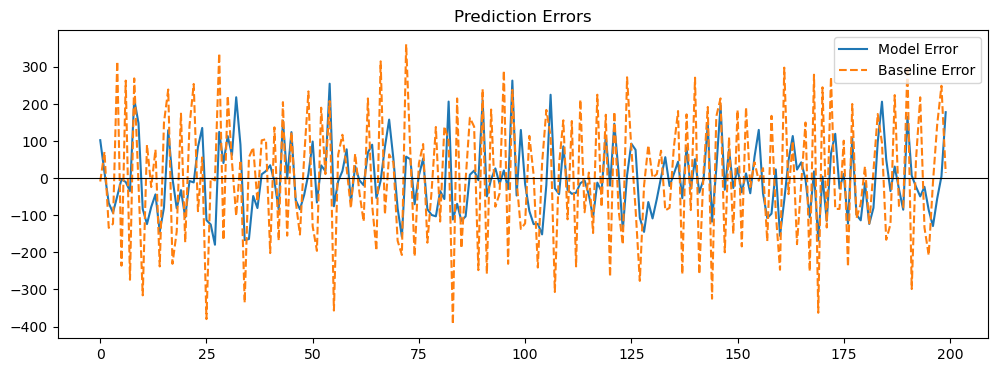

In [36]:
err_model = y_test.values - y_pred
err_base = y_test.values - y_pred_baseline
M = 200
plt.figure(figsize=(12,4))
plt.plot(err_model[:M], label="Model Error")
plt.plot(err_base[:M], label="Baseline Error", linestyle="--")
plt.axhline(0, color="black", linewidth=0.8)
plt.legend()
plt.title("Prediction Errors")
plt.show()